### Problem 1
Implement serial test and apply to a `samples`

Хи-квадрат статистика: 99.20000000000002
p-значение: 0.4754420319581617


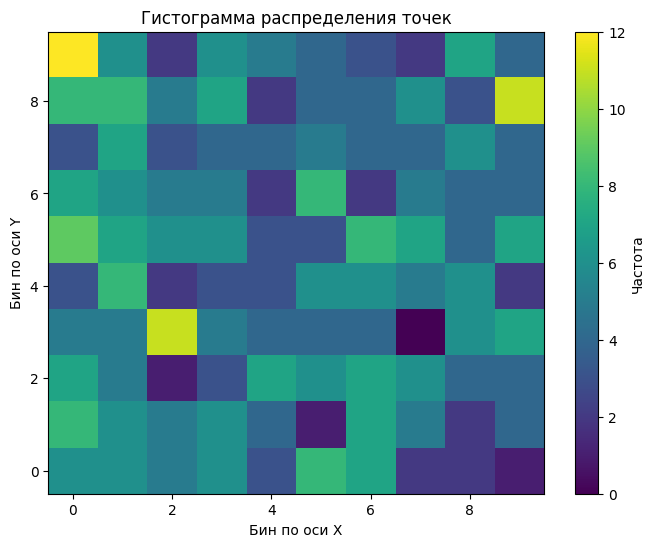

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def gen(size, low=0, high=1): #Генерируем случайную последовательность чисел
    return np.random.uniform(low, high, size)

def func(m, k): #Разбиваем последовательность на k-мерные точки
    return np.array([m[i:i + k] for i in range(0, len(m) - k + 1, k)])

def func1(points, bins=10): #Проверяем независимость с помощью критерия хи-квадрат
    
    #Создаём гистограмму
    hist, edges = np.histogramdd(points, bins=bins)
    
    #Ожидаемое количество (равномерное распределение)
    n = np.full(hist.shape, np.mean(hist))
    
    #Вычисляем хи-квадрат
    chi_sq, p_value = stats.chisquare(hist.ravel(), n.ravel())
    
    return chi_sq, p_value, hist

#Картиночка
def plot_histogram(hist): 
    plt.figure(figsize=(8, 6))
    plt.imshow(hist.T, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(label='Частота')
    plt.title('Гистограмма распределения точек')
    plt.xlabel('Бин по оси X')
    plt.ylabel('Бин по оси Y')
    plt.show()

#Пример
np.random.seed(42)  #для воспроизводимости
m = gen(1000)  #генерируем случайные числа
k = 2  #размерность
points = func(m, k)  #разбиваем на точки

chi_sq, p_value, hist = func1(points, bins=10)

print(f"Хи-квадрат статистика: {chi_sq}")
print(f"p-значение: {p_value}")

#Если p-value < 0.05, то отклоняем гипотезу о независимости

plot_histogram(hist)


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [19]:
#Определение функции  rng
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

#Установка начального значения для rng
rng.current = 1

#Определение функции rng_bad
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m

rng_bad.current = 1

#Генерируем случайные числа
random = [rng_bad() for _ in range(30000)]
random_good = [rng() for _ in range(30000)]

import plotly.express as px

#Создание 3D scatter-графика
fig = px.scatter_3d(x=random[::3], y=random[1::3], z=random[2::3], opacity=0.1) #для наглядности используем только каждое третье значение, чтобы график не был перегружен точками
fig.update_traces(marker_size = 2)
fig.show()

In [20]:

fig = px.scatter_3d(x=random_good[::3], y=random_good[1::3], z=random_good[2::3], opacity=0.1)
fig.update_traces(marker_size = 2)

rng_bad имеет эффект решетки, а rng нет

### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

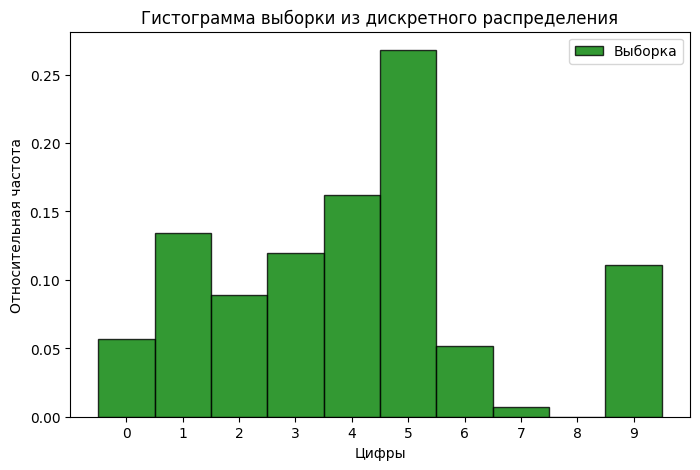

In [19]:
#Заданные веса (вероятности) для цифр
digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

#Нормализируем
weights /= weights.sum()

#Строим вероятности
a = np.cumsum(weights)

#Генерируем 1000 случайных значений
b = np.random.rand(1000)
c = np.searchsorted(a, b)

#Картиночка
plt.figure(figsize=(8, 5))
plt.hist(c, bins=np.arange(11) - 0.5, density=True, alpha=0.8, color='g', edgecolor='black', label="Выборка")
plt.xticks(digits)
plt.xlabel("Цифры")
plt.ylabel("Относительная частота")
plt.title("Гистограмма выборки из дискретного распределения")
plt.legend()
plt.show()

### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

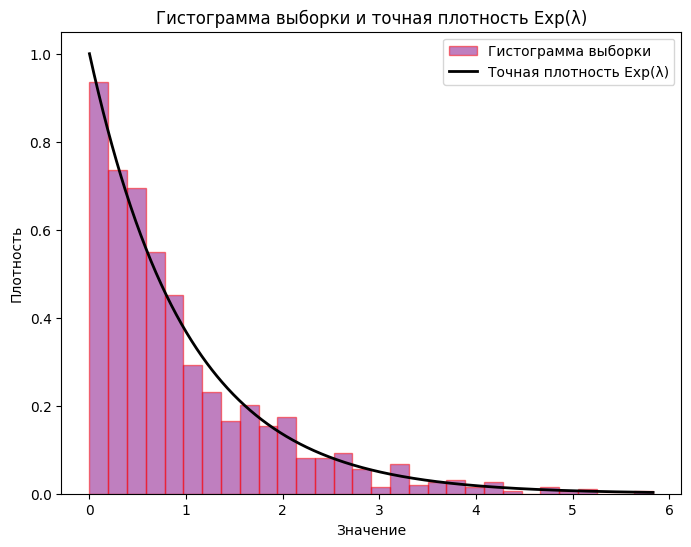

In [20]:
#Параметр распределения
par = 1.0

#Размер выборки
n = 1000

#Генерация случайных чисел, равномерно распределенных на [0, 1]
m = np.random.rand(n)

#Применение метода обратного преобразования
f = -np.log(m) / par

#Строим гистограмму и точную плотность на одном графике
plt.figure(figsize=(8, 6))

#Картиночка
plt.hist(f, bins=30, density=True, color='purple', edgecolor='red', alpha=0.5, label='Гистограмма выборки')
x = np.linspace(0, np.max(f), 1000) #точная плотность экспоненциального распределения
pdf = par * np.exp(-par * x)

plt.plot(x, pdf, color='black', lw=2, label='Точная плотность Exp(λ)')
plt.title('Гистограмма выборки и точная плотность Exp(λ)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()


### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

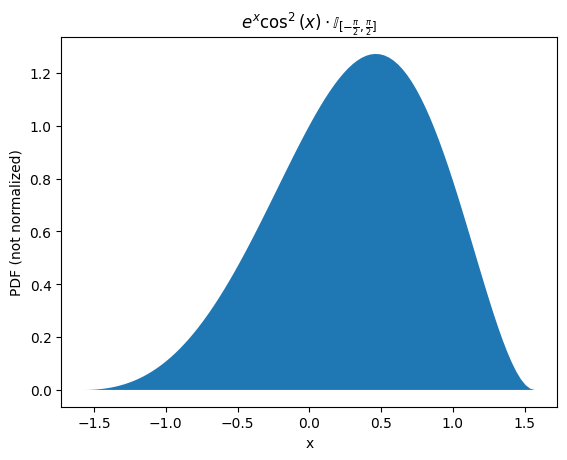

In [3]:
import numpy as np
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

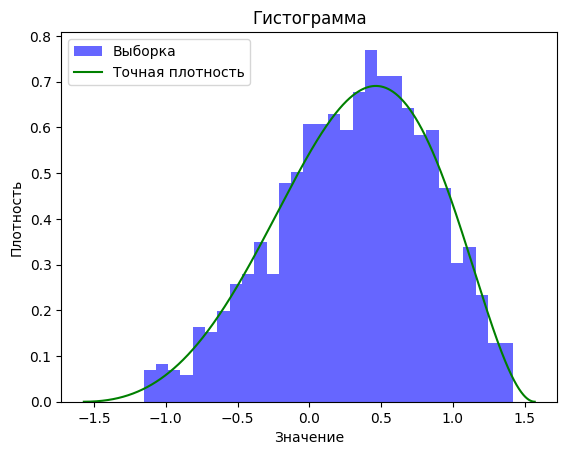

In [ ]:
from scipy.integrate import quad

#Ненормированная плотность вероятности
def func(x):
    return np.exp(x) * np.cos(x)**2

#Вычислим нормировочную константу
integral, error = quad(func, -np.pi/2, np.pi/2)
C = 1 / integral

def density(x):
    return C * func(x)

#Метод принятия-отклонения
samples = []
while len(samples) < 1000:
    x = np.random.uniform(-np.pi/2, np.pi/2) #генерируем случайное число x в интервале от -π/2 до π/2
    y = np.random.uniform(0, 1 / np.pi)*2
    if y <= density(x):
        samples.append(x)

samples = np.array(samples)

#Картиночка
plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label='Выборка')

x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
density_values = density(x_values)

plt.plot(x_values, density_values, 'green', label='Точная плотность')
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.show()

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

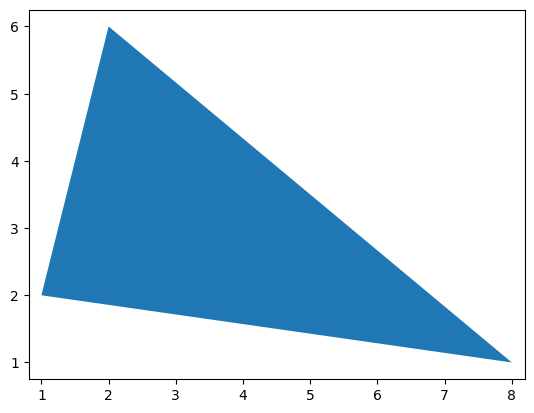

In [5]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

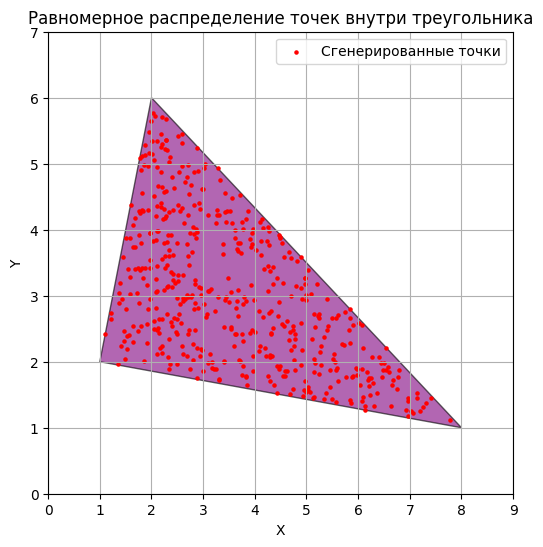

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

#Вершины треугольника
A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])

#Генерируем 500 точек внутри
N = 500
u = np.random.rand(N)
v = np.random.rand(N)

#Барицентрические координаты
s = np.sqrt(u)
x = (1 - s) * A[0] + s * (1 - v) * B[0] + s * v * C[0]
y = (1 - s) * A[1] + s * (1 - v) * B[1] + s * v * C[1]

#Картиночка
fig, ax = plt.subplots(figsize=(6, 6))
polygon = Polygon([A, B, C], closed=True, edgecolor='black', facecolor='purple', alpha=0.6)
ax.add_patch(polygon)
ax.scatter(x, y, color='red', s=5, label="Сгенерированные точки")

ax.set_xlim(min(A[0], B[0], C[0]) - 1, max(A[0], B[0], C[0]) + 1)
ax.set_ylim(min(A[1], B[1], C[1]) - 1, max(A[1], B[1], C[1]) + 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Равномерное распределение точек внутри треугольника")
ax.legend()
plt.grid()
plt.show()

барицентрические координаты представляют собой веса, пропорциональные площадям (или объёмам) частей фигуры, на которые точка делит её.

### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

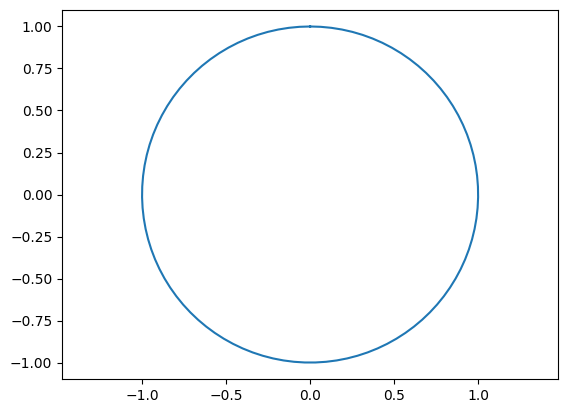

In [7]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

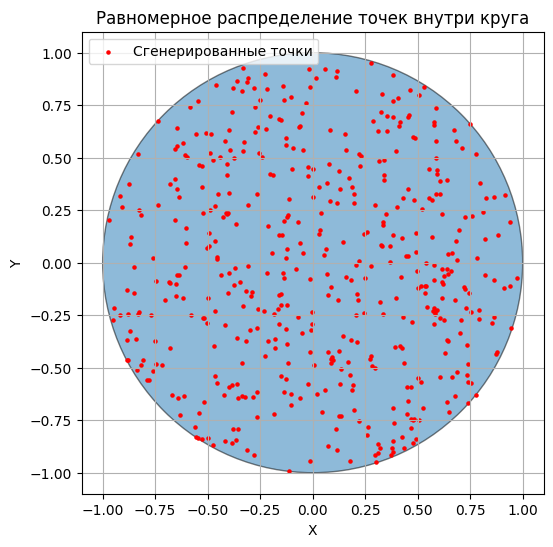

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = 500
#Генерируем углы и радиусы
theta = np.random.uniform(0, 2 * np.pi, n)
r = np.sqrt(np.random.uniform(0, 1, n))  # sqrt обеспечивает равномерность по площади

#Переводим в декартовы координаты
x = r * np.cos(theta)
y = r * np.sin(theta)

#Картиночка
fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, alpha=0.5, edgecolor='black')
ax.add_patch(circle)
ax.scatter(x, y, color='red', s=5, label="Сгенерированные точки")

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Равномерное распределение точек внутри круга")
ax.legend()
ax.set_aspect('equal')  #ось X и Y в одинаковом масштабе
plt.grid()
plt.show()

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [ ]:
import seaborn as sns

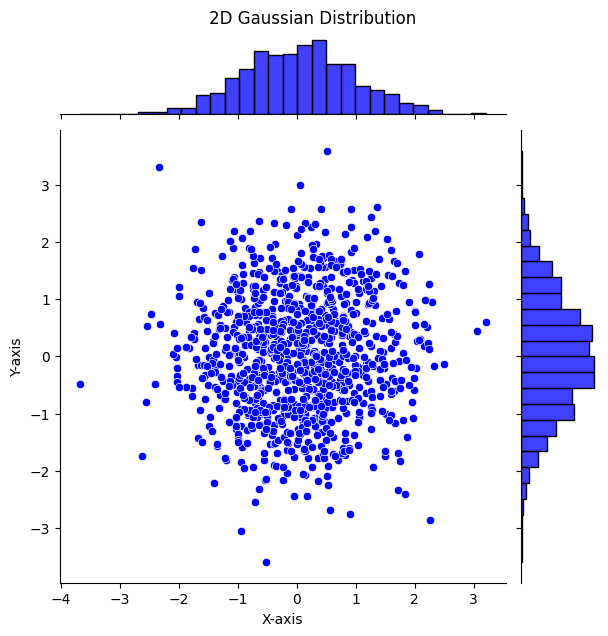

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

Среднее значение выборки: 
[3.92340496 7.37236191]
Выборочная ковариационная матрица: 
[[20.78915084 -3.38397133]
 [-3.38397133 39.13591235]]


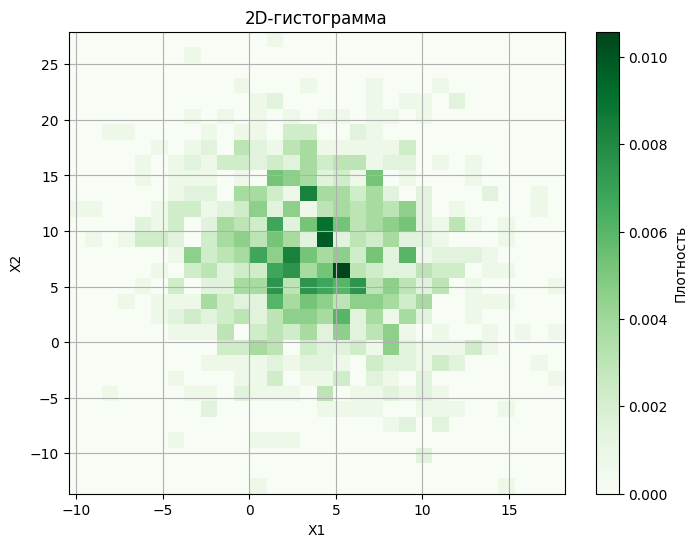

In [67]:
#Функция генерации двух независимых стандартных нормальных величин
def func(n):
    s = []
    while len(s) < n:
        U, V = np.random.uniform(-1, 1, 2)
        S = U**2 + V**2
        if S >= 1 or S == 0:  #отбрасываем точки, которые попадают за круг
            continue
        factor = np.sqrt(-2 * np.log(S) / S)
        s.append(U * factor)
        s.append(V * factor)
    return np.array(s[:n])  #убираем лишние значения (если n нечетное)


mu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

#Разложение Холецкого ковариационной матрицы
L = np.linalg.cholesky(sigma)
Z = func(2 * 1000).reshape(1000, 2)

#Преобразование к требуемому распределению
X = mu + Z @ L.T 

s_mean = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)

print(f"Среднее значение выборки: \n{s_mean}")
print(f"Выборочная ковариационная матрица: \n{cov}")

plt.figure(figsize=(8, 6))
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='Greens', density=True)
plt.colorbar(label="Плотность")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D-гистограмма")
plt.grid(True)
plt.show()